# Image generation with Gen-Ai

In [35]:
import torch 
import torchvision
from torchvision import transforms as T 
from torchvision.datasets import ImageFolder
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.nn import Linear,ReLU,Sequential,Dropout,Sigmoid,Tanh , Conv2d,LeakyReLU,BatchNorm2d,Flatten,ConvTranspose2d
import matplotlib.pyplot as plt 

In [2]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.5],[0.5])
])

In [3]:
# prep training data 
train_set = torchvision.datasets.FashionMNIST(
download=True,
    root=".",
    train=True,
    transform=transform

)

In [4]:
# dataloader 
batch_sz=32
train_loader = DataLoader(dataset=train_set,batch_size=batch_sz,shuffle=True)

In [33]:
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:

D = Sequential(
    Linear(784,1024),
    ReLU(),
    Dropout(0.3),
    Linear(1024,512),
    ReLU(),
    Dropout(0.3),
    Linear(512,256),
    ReLU(),
    Dropout(0.3),
    Linear(256,1),
    Sigmoid()
).to(device)

In [7]:
# Generator model 
G = Sequential(
    Linear(100,256),
    ReLU(),
    Linear(256,512),
    ReLU(),
    Linear(512,1024),
    ReLU(),
    Linear(1024,784),
    Tanh()
).to(device)

In [8]:
loss_fn = nn.BCELoss()
lr =0.0001
optimD = torch.optim.Adam(params=D.parameters(),lr=lr)
optimG = torch.optim.Adam(params=G.parameters(),lr=lr)

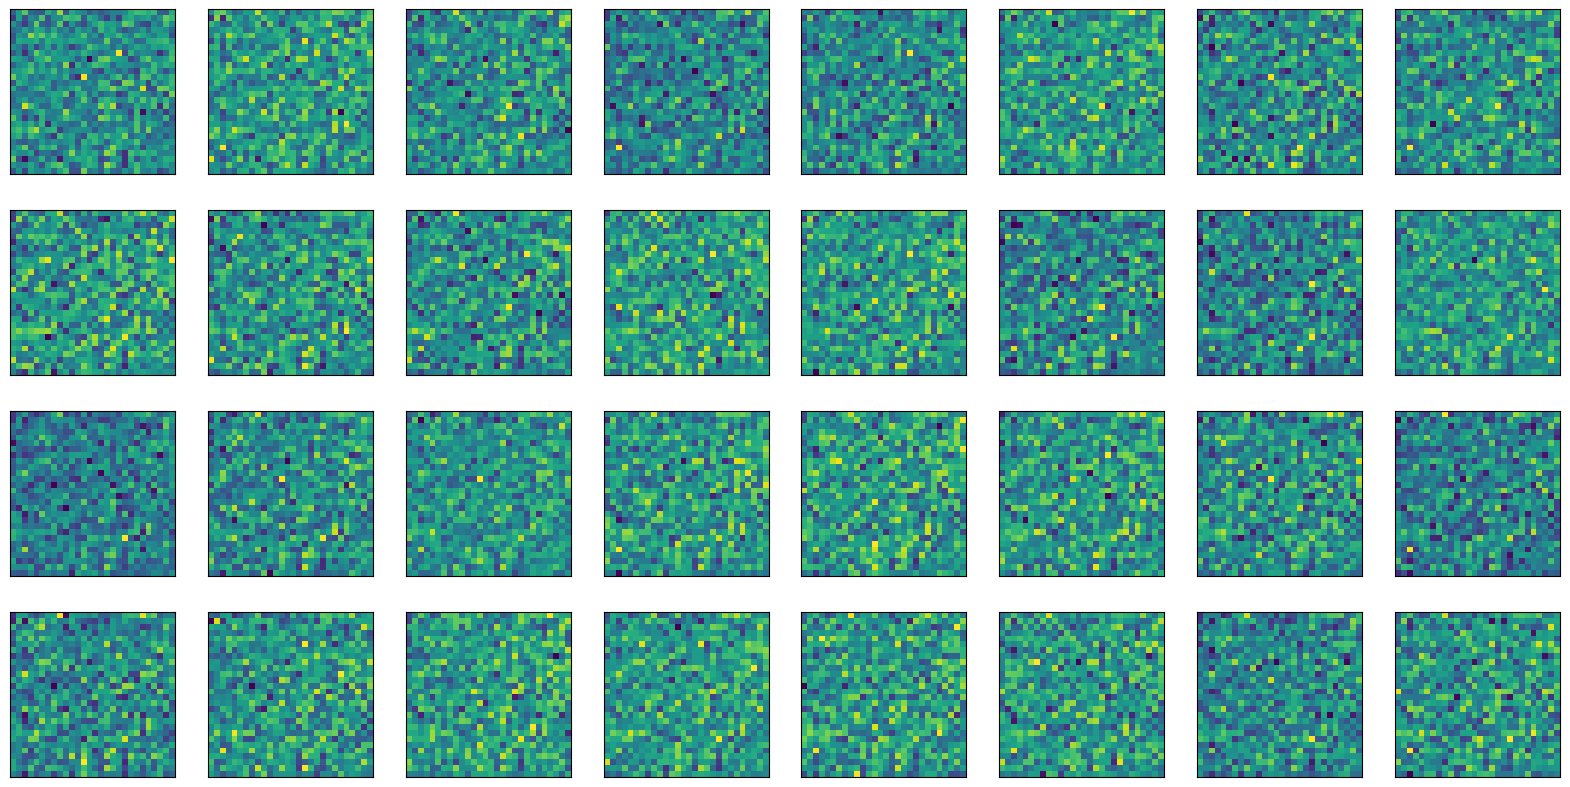

In [9]:
def see_output():
    # noise gen 32 rows of hundred vals
    noise = torch.randn(32,100).to(device)
    fake_samples = G(noise).cpu().detach() # puts the data on CPU for plotting and get the numeric val 
    plt.figure(dpi=100,figsize=(20,10))
    for i in range(32):
        ax = plt.subplot(4,8,i+1)
        img = ((fake_samples[i]/2)+0.5).reshape(28,28)  # cuh the values recieved are in shape of (784,) and we have to de-norm them 
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()

see_output()

In [10]:
real_labels = torch.ones((batch_sz,1)).to(device)
fake_labels = torch.zeros((batch_sz,1)).to(device)

In [11]:
# def train_D_real(real_samples):
#     r = real_samples.reshape(-1,28*28).to(device)
#     preds = D(r)
#     labels = torch.ones((r.shape[0],1)).to(device)
#     lossD = loss_fn(preds,labels)
#     optimD.zero_grad()
#     lossD.backward()
#     optimD.step()
#     return lossD

# def train_D_fake():
#     noise = torch.randn(batch_sz,100).to(device)
#     fake_data = G(noise)
#     preds = D(fake_data)
#     lossD=loss_fn(preds,fake_labels)
#     optimD.zero_grad()
#     lossD.backward()
#     optimD.step()
#     return lossD

# def train_G():
#     noise = torch.randn(batch_sz,100).to(device)
#     gen_data = G(noise)
#     preds=D(gen_data)
#     lossG= loss_fn(preds,real_labels)
#     optimG.zero_grad()
#     lossG.backward()
#     optimG.step()
#     return lossG

at epoch: 10, dloss is: 0.7560502290725708, gloss is: 1.9326462745666504


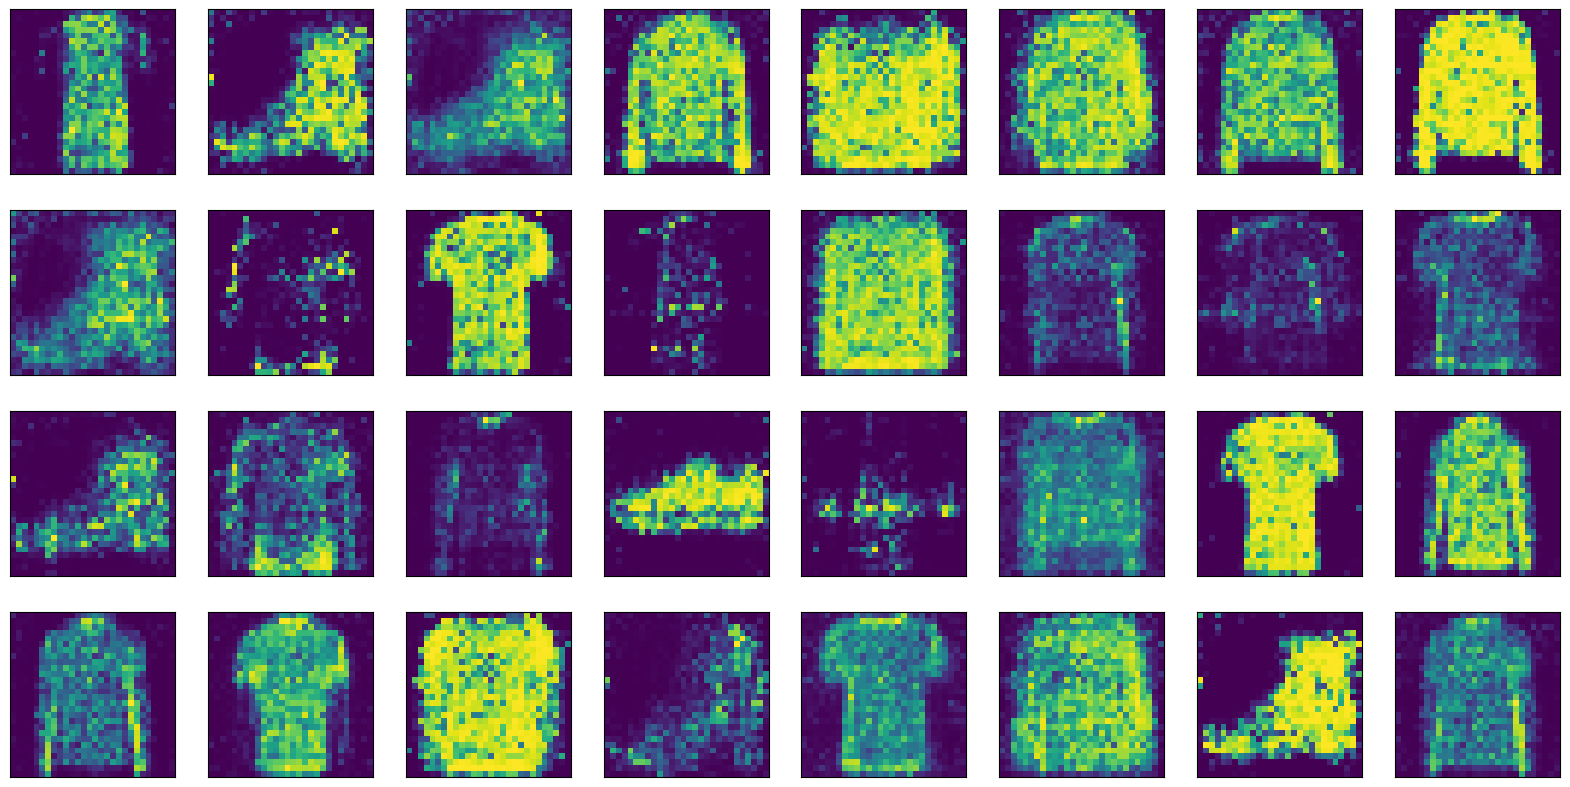

at epoch: 20, dloss is: 1.0779212713241577, gloss is: 1.176823616027832


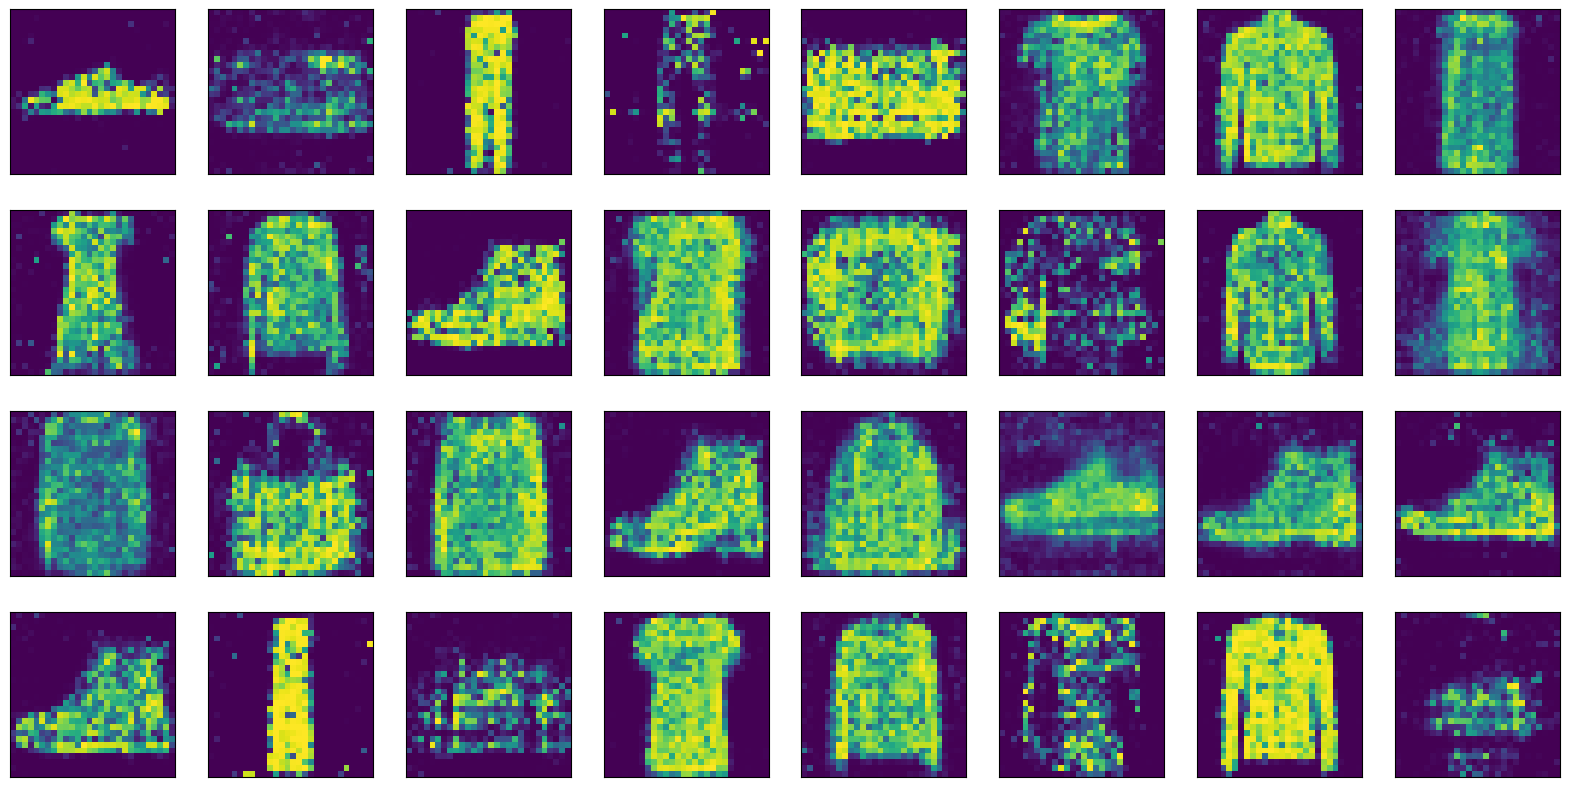

at epoch: 30, dloss is: 1.1701397895812988, gloss is: 1.0141816139221191


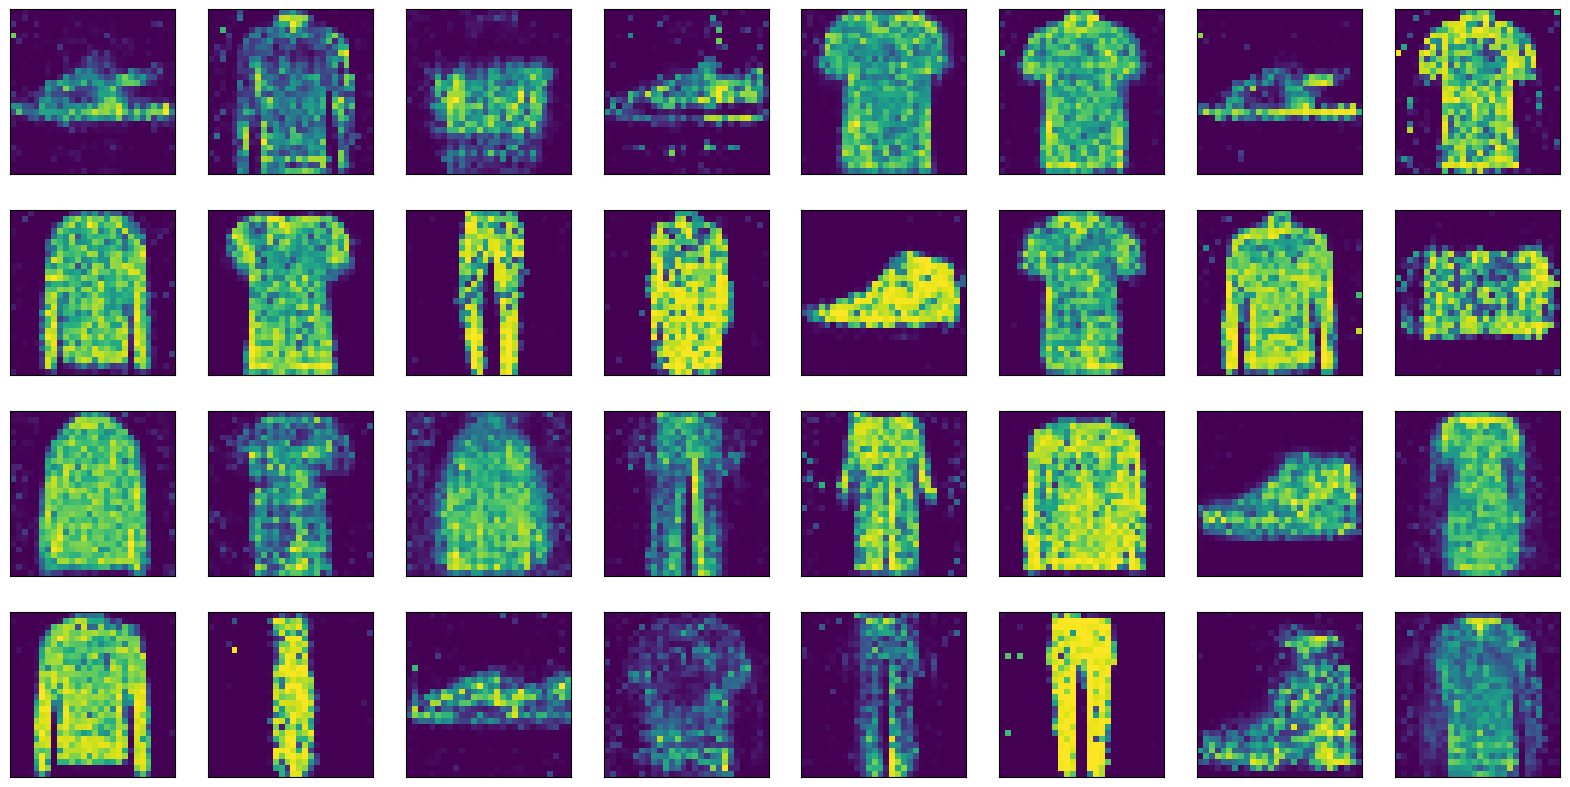

at epoch: 40, dloss is: 1.2176029682159424, gloss is: 0.9349623322486877


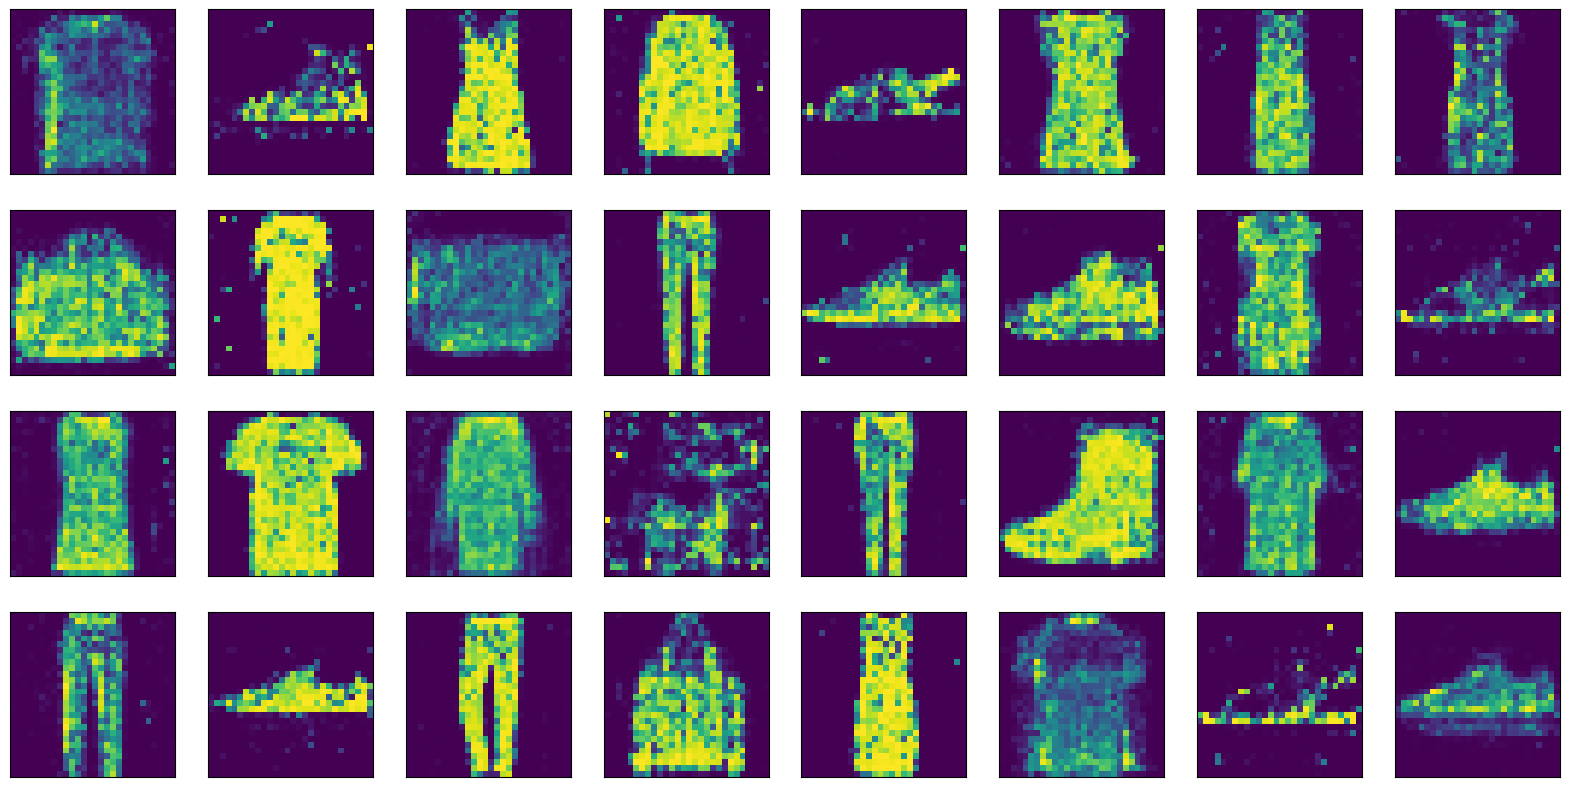

at epoch: 50, dloss is: 1.2194410562515259, gloss is: 0.9198968410491943


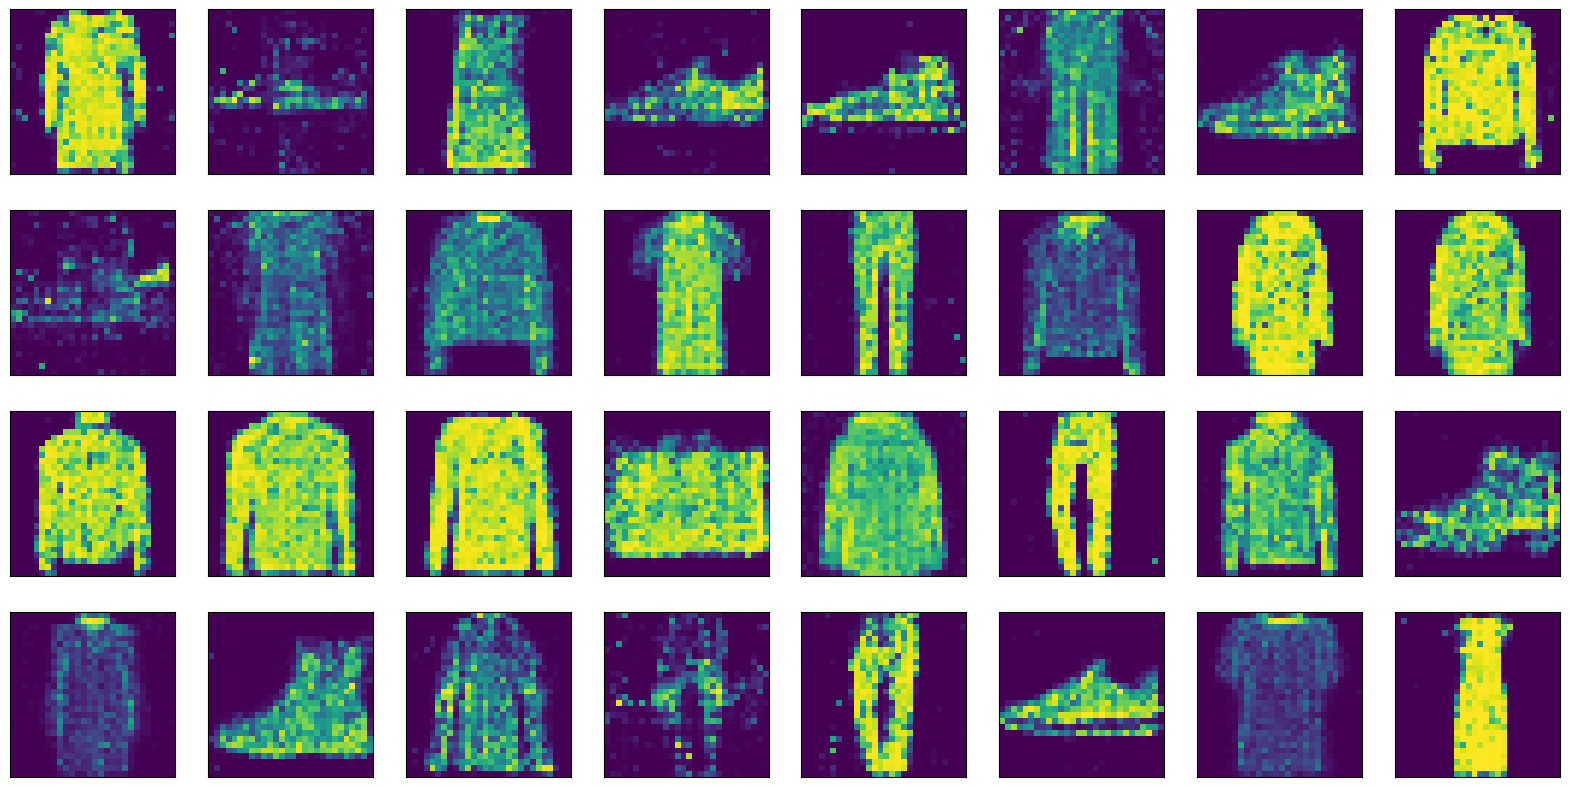

In [12]:
# for i in range(50):
#     gloss =0
#     dloss =0
#     for n , (real_sample,_) in enumerate(train_loader):
#         lossD= train_D_real(real_sample)
#         dloss+=lossD
#         lossD=train_D_fake()
#         dloss+=lossD
#         lossG=train_G()
#         gloss+=lossG
#     gloss=gloss/n
#     dloss=dloss/n
#     if i%10==9:
#         print(f"at epoch: {i+1}, dloss is: {dloss}, gloss is: {gloss}")
#         see_output()

In [13]:
# # save the generator 
# scripted = torch.jit.script(G)
# scripted.save('files/Fashion_gen.pt')

In [14]:
new_G = torch.jit.load('files/Fashion_gen.pt',map_location=device)
new_G.eval()

RecursiveScriptModule(
  original_name=Sequential
  (0): RecursiveScriptModule(original_name=Linear)
  (1): RecursiveScriptModule(original_name=ReLU)
  (2): RecursiveScriptModule(original_name=Linear)
  (3): RecursiveScriptModule(original_name=ReLU)
  (4): RecursiveScriptModule(original_name=Linear)
  (5): RecursiveScriptModule(original_name=ReLU)
  (6): RecursiveScriptModule(original_name=Linear)
  (7): RecursiveScriptModule(original_name=Tanh)
)

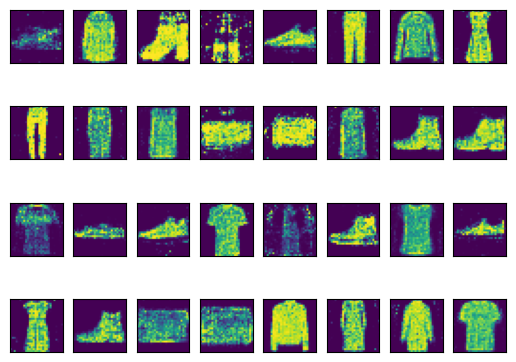

In [15]:
noise = torch.randn(32,100).to(device)
gen_data = new_G(noise).cpu().detach()
for i in range(32):
    ax = plt.subplot(4,8,i+1)
    img = (gen_data[i]/2 + 0.5).reshape(28,28)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.show();

# CONVOLUTIONAL LAYERS

# Anime Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("splcher/animefacedataset")

print("Path to dataset files:", path)

/home/billy/miniconda3/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 395M/395M [01:05<00:00, 6.32MB/s]

Extracting files...


Path to dataset files: /home/billy/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3


In [5]:
transform = T.Compose([
    T.Resize((64,64)),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]) # -1,1 for all color channels 
])


In [6]:
train_set = ImageFolder(root=path,transform=transform)

In [7]:
batch_sz =128
train_loader = DataLoader(dataset=train_set,shuffle=True,batch_size=batch_sz)

In [16]:
image0,_ = train_set[0]
image0.shape

torch.Size([3, 64, 64])

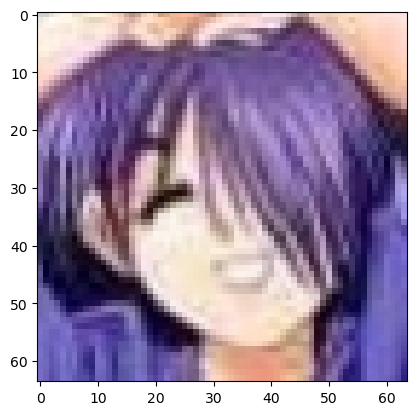

In [21]:
plt.imshow(image0.permute(1,2,0)*0.5 +0.5);

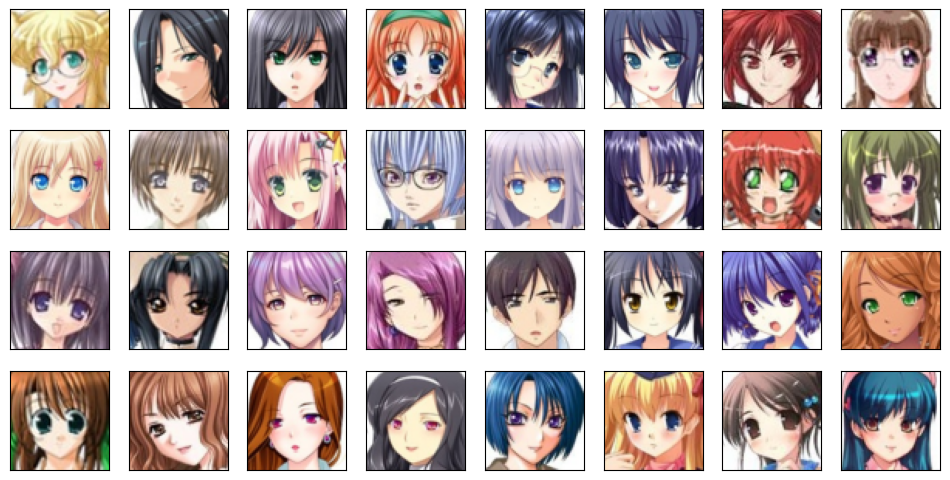

In [32]:
def plot_images(imgs):
    plt.figure(figsize=(12,6))
    for i in range(32):
        ax = plt.subplot(4,8,i+1)
        plt.imshow(imgs[i].permute(1,2,0)*0.5 +0.5)
        plt.xticks([])
        plt.yticks([])
imgs,_ = next(iter(train_loader))
plot_images(imgs)

In [37]:
# Deep convulational Gans 
#discriminator 
D = Sequential(
    Conv2d(3,64,4,2,1,bias=False), # input channel, output vchannel , kernel_size,stride,padding 
    LeakyReLU(0.2,inplace=True),
    Conv2d(64,128,4,2,1,bias=False),
    BatchNorm2d(128),
    LeakyReLU(0.2,inplace=True),
    Conv2d(128,256,4,2,1,bias=False),
    BatchNorm2d(256),
    LeakyReLU(0.2,inplace=True),
    Conv2d(256,512,4,2,1,bias=False),
    BatchNorm2d(512),
    LeakyReLU(0.2,inplace=True),
    Conv2d(512,1,4,1,0,bias=False),
    Sigmoid(),
    Flatten()
).to(device)

# Generator
G=Sequential(
    ConvTranspose2d(100,512,4,1,0,bias=False),
    BatchNorm2d(512),
    ReLU(inplace=True),
    ConvTranspose2d(512,256,4,2,1,bias=False),
    BatchNorm2d(256),
    ReLU(inplace=True),
    ConvTranspose2d(256,128,4,2,1,bias=False),
    BatchNorm2d(128),
    ReLU(inplace=True),
    ConvTranspose2d(128,64,4,2,1,bias=False),
    BatchNorm2d(64),
    ReLU(inplace=True),
    ConvTranspose2d(64,3,4,2,1,bias=False),
    Tanh()
).to(device)

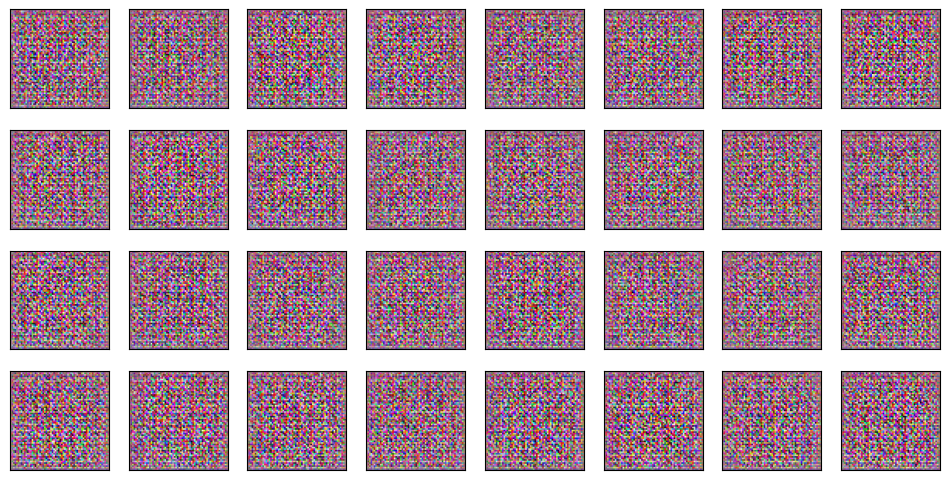

In [46]:
# test plot 
def test_epoch(ok=False):
    noise = torch.randn(32,100,1,1).to(device)
    fake_samples= G(noise).cpu().detach()
    plt.figure(figsize=(12,6))
    for i in range(32):
        ax=plt.subplot(4,8,i+1)
        plt.imshow((fake_samples[i]/2+0.5).permute(1,2,0))
        plt.xticks([])
        plt.yticks([])
    if(ok):
        return fake_samples
store_1=test_epoch(ok=True)

In [47]:
loss_fn = nn.BCELoss()
lr = 0.002
optimG=torch.optim.Adam(G.parameters(),lr=lr,betas=(0.5,0.999))
optimD = torch.optim.Adam(D.parameters(),lr=lr,betas=(0.5,0.999))

In [52]:
real_labels = torch.ones((batch_sz,1)).to(device)
fake_labels = torch.zeros((batch_sz,1)).to(device)

# train D on real

def train_D_real(real_samples):
    real_samples=real_samples.to(device)
    preds = D(real_samples)
    labels = torch.ones((real_samples.shape[0],1)).to(device)
    lossD = loss_fn(preds,labels)
    optimD.zero_grad()
    lossD.backward()
    optimD.step()
    return lossD

def train_D_fake():
    noise =torch.randn(batch_sz,100,1,1).to(device)
    fake_samples = G(noise)
    preds = D(fake_samples)
    lossD=loss_fn(preds,fake_labels)
    optimD.zero_grad()
    lossD.backward()
    optimD.step()
    return lossD

def train_G():
    noise = torch.randn(batch_sz,100,1,1).to(device)
    gen_data = G(noise)
    preds= D(gen_data)
    lossG = loss_fn(preds,real_labels)
    optimG.zero_grad()
    lossG.backward()
    optimG.step()
    return lossG

In [53]:
for i in range(20):
    gloss=0
    dloss=0
    for n,(real_sample,_)in enumerate(train_loader):
        lossD=train_D_real(real_sample)
        dloss+=lossD
        lossD=train_D_fake()
        dloss+=lossD
        lossG=train_G()
        gloss+=lossG
    gloss/=n
    dloss/=n
    if i+1%5==0:
        print(f"epoch {i+1}, dloss: {dloss}, gloss: {gloss}")
        test_epoch()

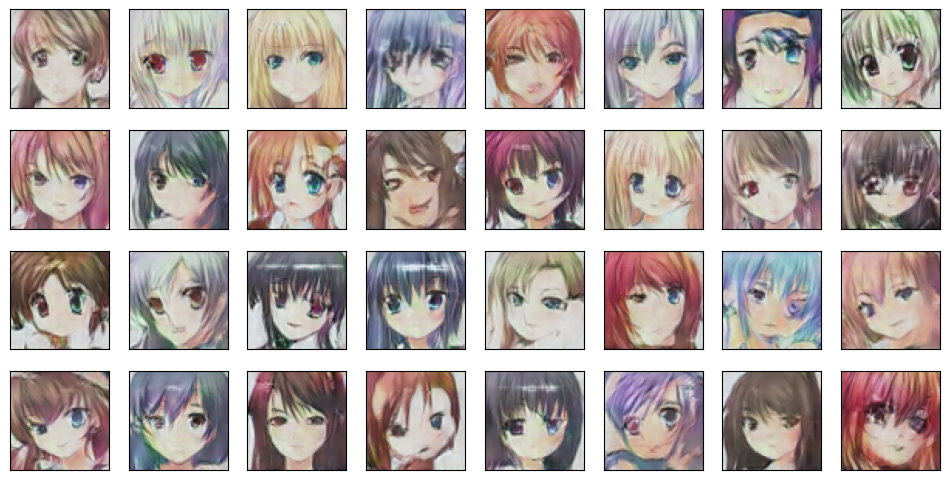

In [69]:
test()

In [54]:
scripted = torch.jit.script(G)
scripted.save('files/anime_gen.pt')

In [55]:
new_G = torch.jit.load('files/anime_gen.pt',map_location=device)
new_G.eval()

RecursiveScriptModule(
  original_name=Sequential
  (0): RecursiveScriptModule(original_name=ConvTranspose2d)
  (1): RecursiveScriptModule(original_name=BatchNorm2d)
  (2): RecursiveScriptModule(original_name=ReLU)
  (3): RecursiveScriptModule(original_name=ConvTranspose2d)
  (4): RecursiveScriptModule(original_name=BatchNorm2d)
  (5): RecursiveScriptModule(original_name=ReLU)
  (6): RecursiveScriptModule(original_name=ConvTranspose2d)
  (7): RecursiveScriptModule(original_name=BatchNorm2d)
  (8): RecursiveScriptModule(original_name=ReLU)
  (9): RecursiveScriptModule(original_name=ConvTranspose2d)
  (10): RecursiveScriptModule(original_name=BatchNorm2d)
  (11): RecursiveScriptModule(original_name=ReLU)
  (12): RecursiveScriptModule(original_name=ConvTranspose2d)
  (13): RecursiveScriptModule(original_name=Tanh)
)

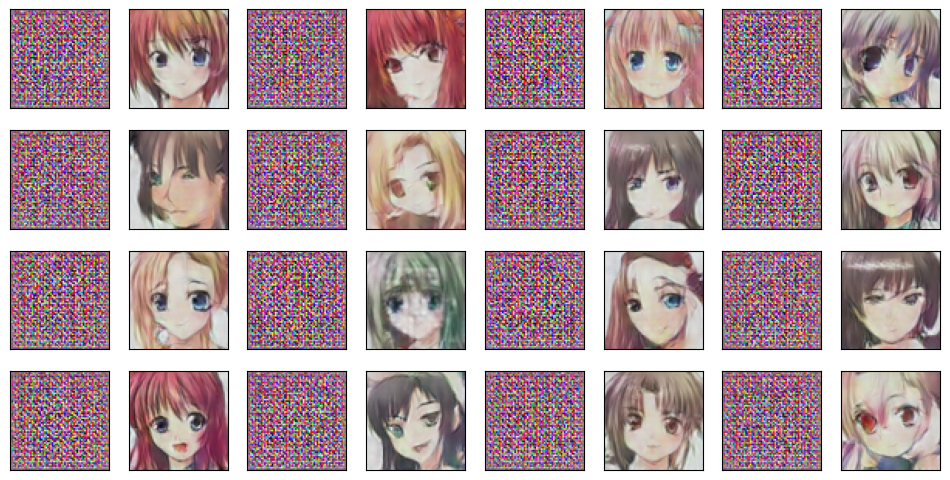

In [65]:
noise = torch.randn(32,100,1,1).to(device)
gen_data = new_G(noise).cpu().detach()
plt.figure(figsize=(12,6))
for i in range (16):
    ax = plt.subplot(4,8,2*i+1)
    plt.imshow((store_1[i]/2+0.5).permute(1,2,0))
    plt.xticks([])
    plt.yticks([])

    ax = plt.subplot(4,8,2*i+2)
    plt.imshow((gen_data[i]/2+0.5).permute(1,2,0))
    plt.xticks([])
    plt.yticks([])

plt.show();